## CIFAR Using CNN 

#### Ahmad Pouramini, Benyamin Hosseini 

---



This is the implementatin of CIFAR using CNN.

Source: https://blog.plon.io/tutorials/cifar-10-classification-using-keras-tutorial/

Other Sources: https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/

Question PDF: https://drive.google.com/open?id=1sySPwALk8alK38ejbjCoN5fS_YSHaBPs


## Loading Data

Found GPU at:/device:GPU:0


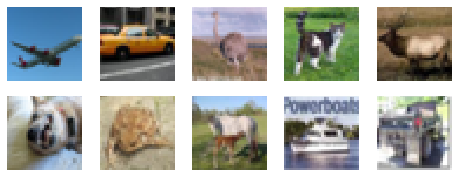

In [12]:
# Import all modules
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
# from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp

# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

# GPU Processing
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at:{}'.format(device_name))

batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
 
num_classes = 10 #
# epochs = 100 # repeat 100 times

(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)
# x_train - training data(images), y_train - labels(digits)

# Print figure with 10 random images from each
 
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
#   ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


## Data Normalization

In [0]:
# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
#y_valid = np_utils.to_categorical(y_valid, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_valid = x_valid.astype('float32')
x_train  /= 255
x_test /= 255
#x_valid /= 255

# Creating the base model 1:
##ReLU Activation Function

In [0]:
# Based on:
# github.com/abhijeet3922/Object-recognition-CIFAR-10/blob/master/cifar10.py

def base_model_ReLU():  # 3 Convolutional layers + 1 hidden layer MLP
    model = Sequential()
   
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))  # first layer filters: 32 filters 3x3
    #model.add(Dropout(0.2))

    model.add(Conv2D(32, (3, 3), activation='relu'))  # second layer filters: 32 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # second layer pooling: max pooling 2x2

    model.add(Conv2D(64, (3, 3), activation='relu'))  # third layer filters: 64 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # third layer pooling: max pooling 2x2

    # MLP
    model.add(Flatten())
    #model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu',kernel_constraint=maxnorm(3)))  # MLP first hidden layer neurons
    #model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))  # MLP output layer neurons
    
    epochs = 10 
    lrate = 0.01
    decay = lrate/epochs
    sgd = SGD(lr=lrate, decay=decay, momentum=0.9, nesterov=False)  # sigmoid optimizer

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Creating the base model 2:
##Sigmoid Activation Function

In [0]:
# Based on:
# github.com/abhijeet3922/Object-recognition-CIFAR-10/blob/master/cifar10.py

def base_model_sigmoid():  # 3 Convolutional layers + 1 hidden layer MLP
    model = Sequential()
   
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='sigmoid'))  # first layer filters: 32 filters 3x3
    #model.add(Dropout(0.2))

    model.add(Conv2D(32, (3, 3), activation='sigmoid'))  # second layer filters: 32 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # second layer pooling: max pooling 2x2

    model.add(Conv2D(64, (3, 3), activation='sigmoid'))  # third layer filters: 64 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # third layer pooling: max pooling 2x2

    # MLP
    model.add(Flatten())
    #model.add(Dropout(0.2))
    model.add(Dense(512, activation='sigmoid',kernel_constraint=maxnorm(3)))  # MLP first hidden layer neurons
    #model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))  # MLP output layer neurons
    
    epochs = 10 
    lrate = 0.01
    decay = lrate/epochs
    sgd = SGD(lr=lrate, decay=decay, momentum=0.9, nesterov=False)  # sigmoid optimizer

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Creating the base model 3:
##Tanh Activation Function

In [0]:
# Based on:
# github.com/abhijeet3922/Object-recognition-CIFAR-10/blob/master/cifar10.py

def base_model_tanh():  # 3 Convolutional layers + 1 hidden layer MLP
    model = Sequential()
   
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='tanh'))  # first layer filters: 32 filters 3x3
    #model.add(Dropout(0.2))

    model.add(Conv2D(32, (3, 3), activation='tanh'))  # second layer filters: 32 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # second layer pooling: max pooling 2x2

    model.add(Conv2D(64, (3, 3), activation='tanh'))  # third layer filters: 64 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # third layer pooling: max pooling 2x2

    # MLP
    model.add(Flatten())
    #model.add(Dropout(0.2))
    model.add(Dense(512, activation='tanh',kernel_constraint=maxnorm(3)))  # MLP first hidden layer neurons
    #model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))  # MLP output layer neurons
    
    epochs = 10 
    lrate = 0.01
    decay = lrate/epochs
    sgd = SGD(lr=lrate, decay=decay, momentum=0.9, nesterov=False)  # sigmoid optimizer

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

## The model summary

In [17]:
cnn_n1 = base_model_ReLU()
cnn_n1.summary()

cnn_n2 = base_model_sigmoid()
cnn_n2.summary()

cnn_n3 = base_model_tanh()
cnn_n3.summary()
# visualize model

# from keras_ascii_sequential import sequential_model_to_ascii_printout 

# sequential_model_to_ascii_printout(cnn_n)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 30, 30)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 13, 13)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 6, 6)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1180160   
__________

## Training the Model

In [18]:
epochs = 10
cnn1 = cnn_n1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32)


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 20s 393us/step - loss: 1.5702 - acc: 0.4315 - val_loss: 1.2962 - val_acc: 0.5430
Epoch 2/10
50000/50000 [==============================] - 19s 386us/step - loss: 1.1143 - acc: 0.6091 - val_loss: 1.0617 - val_acc: 0.6328
Epoch 3/10
50000/50000 [==============================] - 19s 386us/step - loss: 0.9133 - acc: 0.6817 - val_loss: 0.9712 - val_acc: 0.6648
Epoch 4/10
50000/50000 [==============================] - 19s 385us/step - loss: 0.7712 - acc: 0.7323 - val_loss: 0.9091 - val_acc: 0.6914
Epoch 5/10
50000/50000 [==============================] - 19s 389us/step - loss: 0.6601 - acc: 0.7716 - val_loss: 0.8880 - val_acc: 0.7019
Epoch 6/10
50000/50000 [==============================] - 19s 375us/step - loss: 0.5633 - acc: 0.8060 - val_loss: 0.8952 - val_acc: 0.7021
Epoch 7/10
50000/50000 [==============================] - 19s 379us/step - loss: 0.4733 - acc: 0.8378 - val_loss: 0.

In [19]:
cnn2 = cnn_n2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32)


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s 383us/step - loss: 2.3198 - acc: 0.0985 - val_loss: 2.3034 - val_acc: 0.1000
Epoch 2/10
50000/50000 [==============================] - 19s 378us/step - loss: 2.3038 - acc: 0.0997 - val_loss: 2.3030 - val_acc: 0.1000
Epoch 3/10
50000/50000 [==============================] - 19s 374us/step - loss: 2.3034 - acc: 0.0996 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 4/10
50000/50000 [==============================] - 19s 382us/step - loss: 2.3031 - acc: 0.1002 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 5/10
50000/50000 [==============================] - 19s 375us/step - loss: 2.3030 - acc: 0.0990 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/10
50000/50000 [==============================] - 19s 377us/step - loss: 2.3029 - acc: 0.1006 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 7/10
50000/50000 [==============================] - 19s 377us/step - loss: 2.3028 - acc: 0.1008 - val_loss: 2.

In [20]:
cnn3 = cnn_n3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s 388us/step - loss: 1.3786 - acc: 0.5098 - val_loss: 1.1195 - val_acc: 0.6035
Epoch 2/10
50000/50000 [==============================] - 19s 378us/step - loss: 1.0309 - acc: 0.6386 - val_loss: 1.0249 - val_acc: 0.6417
Epoch 3/10
50000/50000 [==============================] - 19s 379us/step - loss: 0.9122 - acc: 0.6818 - val_loss: 0.9716 - val_acc: 0.6593
Epoch 4/10
50000/50000 [==============================] - 19s 378us/step - loss: 0.8321 - acc: 0.7125 - val_loss: 0.9198 - val_acc: 0.6826
Epoch 5/10
50000/50000 [==============================] - 19s 378us/step - loss: 0.7650 - acc: 0.7371 - val_loss: 0.9176 - val_acc: 0.6841
Epoch 6/10
50000/50000 [==============================] - 19s 381us/step - loss: 0.7122 - acc: 0.7559 - val_loss: 0.8871 - val_acc: 0.6964
Epoch 7/10
50000/50000 [==============================] - 19s 378us/step - loss: 0.6662 - acc: 0.7732 - val_loss: 0.

## Saving Model

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

save_path = "gdrive/My Drive/cifar/models/cnn1.h5"
cnn_n.save(save_path)
print('done saving model at',save_path)

## Loading back the saved model

https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

In [0]:
del cnn # deletes the existing model

from keras.models import load_model

# returns a compiled model
# identical to the previous one
cnn = load_model(save_path)

cnn.summary()

## Results

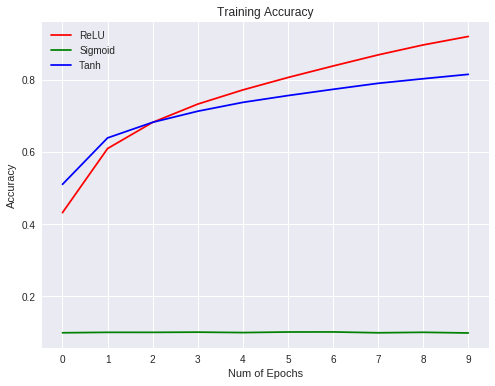

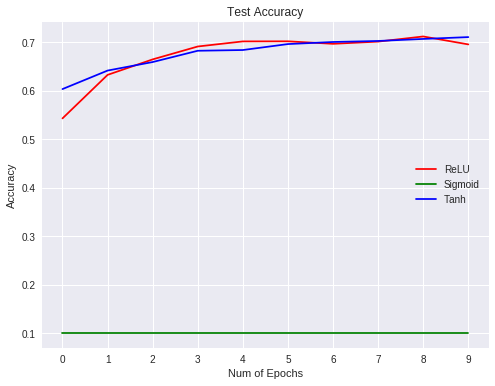

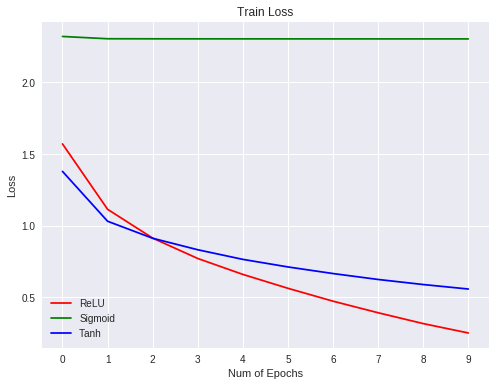

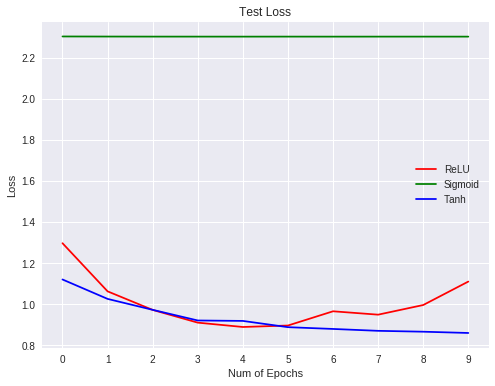

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[770  32  56  23  27  15  11  16  19  31]
 [ 26 833  12  15   3   3  19   6  13  70]
 [ 57   7 597  51  71  75  90  39   6   7]
 [ 17   8  79 492  54 191  95  41   9  14]
 [ 17   5  87  70 615  37  72  78  11   8]
 [ 14   3  57 156  47 617  45  54   1   6]
 [  9   1  43  35  24  26 847   8   3   4]
 [ 16   4  32  43  58  62  15 756   3  11]
 [118  58  28  21  13  10  14   5 697  36]
 [ 47 118  17  19   4  13  14  23  12 733]]


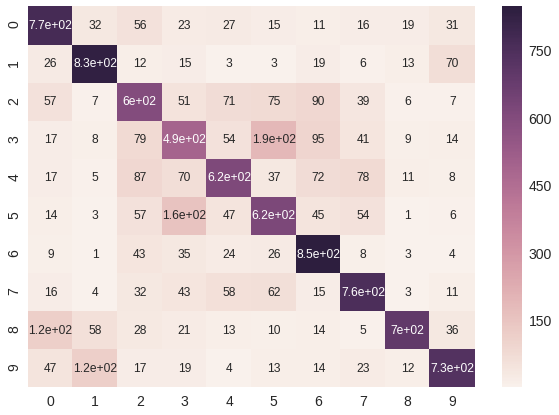

In [21]:
plt.figure(0)
plt.plot(cnn1.history['acc'],'r')
plt.plot(cnn2.history['acc'],'g')
plt.plot(cnn3.history['acc'],'b')
plt.xticks(np.arange(0, epochs, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend(['ReLU','Sigmoid', 'Tanh'])

plt.figure(1)
plt.plot(cnn1.history['val_acc'],'r')
plt.plot(cnn2.history['val_acc'],'g')
plt.plot(cnn3.history['val_acc'],'b')
plt.xticks(np.arange(0, epochs, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.legend(['ReLU','Sigmoid', 'Tanh'])

plt.figure(2)
plt.plot(cnn1.history['loss'],'r')
plt.plot(cnn2.history['loss'],'g')
plt.plot(cnn3.history['loss'],'b')
plt.xticks(np.arange(0, epochs, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Train Loss")
plt.legend(['ReLU','Sigmoid', 'Tanh'])

plt.figure(3)
plt.plot(cnn1.history['val_loss'],'r')
plt.plot(cnn2.history['val_loss'],'g')
plt.plot(cnn3.history['val_loss'],'b')
plt.xticks(np.arange(0, epochs, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Test Loss")
plt.legend(['ReLU','Sigmoid', 'Tanh'])
 
plt.show()


# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred1 = cnn_n1.predict(x_test, verbose=2)
y_pred1 = np.argmax(Y_pred1, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred1)[ix].sum())
cm1 = confusion_matrix(np.argmax(y_test,axis=1),y_pred1)
print(cm1)

# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm1 = pd.DataFrame(cm1, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm1, annot=True,annot_kws={"size": 12})# font size
plt.show()
